<a href="https://colab.research.google.com/github/mmarushika/sdc-lab/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 53s 30ms/step - accuracy: 0.8888 - loss: 0.3542 - val_accuracy: 0.9797 - val_loss: 0.0698
Epoch 2/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 78s 28ms/step - accuracy: 0.9840 - loss: 0.0541 - val_accuracy: 0.9897 - val_loss: 0.0394
Epoch 3/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 84s 29ms/step - accuracy: 0.9902 - loss: 0.0309 - val_accuracy: 0.9910 - val_loss: 0.0388
313/313 - 3s - 8ms/step - accuracy: 0.9862 - loss: 0.0412

✅ Test accuracy: 0.9862
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step

🔢 Predicted label for the first test image: 7


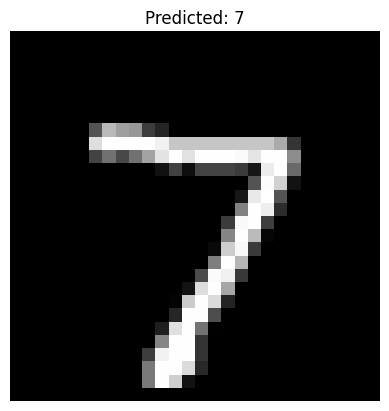

In [1]:
# Step 1: Install TensorFlow if not already installed
!pip install -q tensorflow

# Step 2: Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Step 3: Load sample dataset (MNIST)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape input data
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Step 4: Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Step 5: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 6: Train the model
model.fit(x_train, y_train, epochs=3, validation_split=0.1)

# Step 7: Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\n✅ Test accuracy: {test_acc:.4f}')

# Step 8: Predict a single image
import numpy as np
sample = np.expand_dims(x_test[0], axis=0)
prediction = model.predict(sample)
predicted_label = np.argmax(prediction)
print(f"\n🔢 Predicted label for the first test image: {predicted_label}")

# Display the image
plt.imshow(x_test[0].reshape(28,28), cmap='gray')
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()
